<a href="https://colab.research.google.com/github/dewipuspita0904/Submission-BikeSharingDataset/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Dewi Puspita
- **Email:** dewi944puspita@gmail.com
- **ID Dicoding:** dewi_puspita_944

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh cuaca terhadap jumlah peminjaman sepeda?
- Kapan waktu paling sibuk untuk penyewaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Data Wrangling

### Gathering Data

In [7]:
#Pengecekan apakah dataset tersedia sebelum membaca data
file_path_day = "/content/day.csv"
file_path_hour = "/content/hour.csv"

if os.path.exists(file_path_day) and os.path.exists(file_path_hour):
    day_df = pd.read_csv(file_path_day)
    hour_df = pd.read_csv(file_path_hour)
    print("Dataset berhasil dimuat!")
else:
    raise FileNotFoundError("Error: File dataset tidak ditemukan!")

Dataset berhasil dimuat!


In [8]:
# Menampilkan 5 baris pertama
display(day_df.head())
display(hour_df.head())

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Struktur dataset dapat diketahui dari 5 baris pertama.
- Identifikasi kolom penting seperti `cnt` (jumlah penyewaan), `weathersit` (kondisi cuaca), dan `hr` (jam).
- Jika terdapat nilai aneh atau format data yang tidak sesuai, maka perlu dilakukan pembersihan data.

### Assessing Data

In [9]:
# Informasi dataset
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [10]:
# Statistik deskriptif dataset
display(day_df.describe())
display(hour_df.describe())

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Cek apakah ada **missing values atau anomali**.
- Pastikan t**ipe data** sudah sesuai.
- **Distribusi statistik** dasar dapat membantu mendeteksi nilai ekstrem atau kesalahan dalam data.


### Cleaning Data

In [11]:
# Mengecek missing values
display(day_df.isnull().sum())
display(hour_df.isnull().sum())

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [12]:
# Mengecek jumlah duplikasi
duplicates_day = day_df.duplicated().sum()
duplicates_hour = hour_df.duplicated().sum()

In [13]:
# Menghapus duplikasi jika ada
if duplicates_day > 0:
    day_df = day_df.drop_duplicates()

if duplicates_hour > 0:
    hour_df = hour_df.drop_duplicates()

**Insight:**
- Jika terdapat **missing values**, perlu diputuskan apakah akan diisi atau dihapus.
- Jika ada **duplikasi**, perlu dilakukan tindakan pembersihan.

## Exploratory Data Analysis (EDA)

### Distribusi Jumlah Penyewaan Sepeda

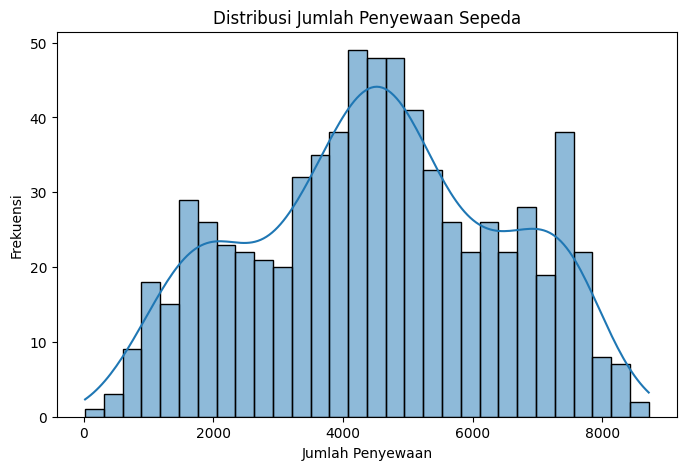

In [15]:
# Univariate Analysis: Distribusi jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.histplot(day_df['cnt'], bins=30, kde=True)
plt.title("Distribusi Jumlah Penyewaan Sepeda")
plt.xlabel("Jumlah Penyewaan")
plt.ylabel("Frekuensi")
plt.show()

**Insight:**
- Distribusi jumlah penyewaan condong ke kanan (skewed right), artinya lebih banyak hari dengan jumlah penyewaan rendah dibandingkan yang tinggi.
- Ada beberapa hari dengan jumlah penyewaan yang sangat tinggi, ini bisa menjadi outlier yang perlu diperiksa lebih lanjut.

**Rekomendasi:** Lakukan segmentasi hari-hari dengan penyewaan tertinggi untuk memahami faktor penyebab lonjakan tersebut.

### Hubungan Antara Suhu dan Jumlah Penyewaan

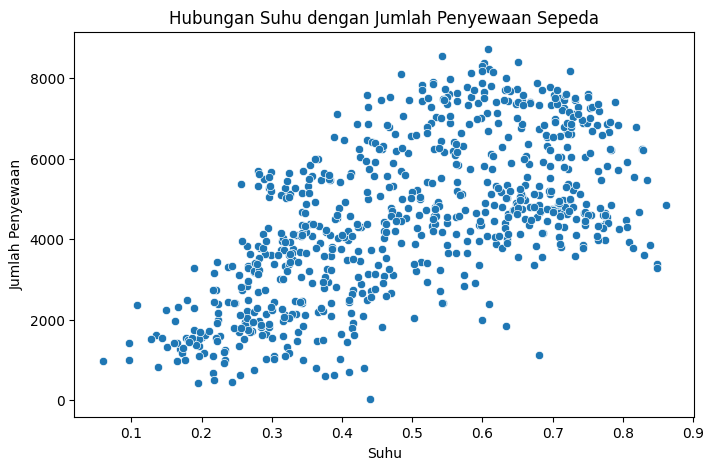

In [16]:
# Bivariate Analysis: Hubungan antara suhu dan jumlah penyewaan
plt.figure(figsize=(8, 5))
sns.scatterplot(x=day_df['temp'], y=day_df['cnt'])
plt.title("Hubungan Suhu dengan Jumlah Penyewaan Sepeda")
plt.xlabel("Suhu")
plt.ylabel("Jumlah Penyewaan")
plt.show()

**Insight:**
- Semakin tinggi suhu, semakin banyak sepeda yang disewa.
- Pada suhu rendah (misalnya di bawah 0.2 pada skala normalisasi), jumlah penyewaan lebih sedikit.
- Saat suhu mendekati 0.6–0.8 (mewakili suhu hangat), jumlah penyewaan meningkat.
- Ini menunjukkan bahwa orang cenderung lebih banyak menyewa sepeda saat cuaca lebih hangat.

**Rekomendasi:** Meningkatkan jumlah sepeda yang tersedia saat musim panas karena permintaan meningkat.

### Agregasi Data

In [28]:
# Agregasi jumlah penyewaan sepeda berdasarkan kondisi cuaca
weather_agg = day_df.groupby("weathersit")["cnt"].mean().reset_index()
weather_agg["weathersit"] = weather_agg["weathersit"].map({1: "Cerah", 2: "Mendung", 3: "Hujan Ringan", 4: "Hujan Lebat"})

In [29]:
# Agregasi jumlah penyewaan sepeda berdasarkan jam
hourly_agg = hour_df.groupby("hr")["cnt"].mean().reset_index()

## Visualization & Explanatory Analysis

### Pengaruh Cuaca terhadap Penyewaan Sepeda

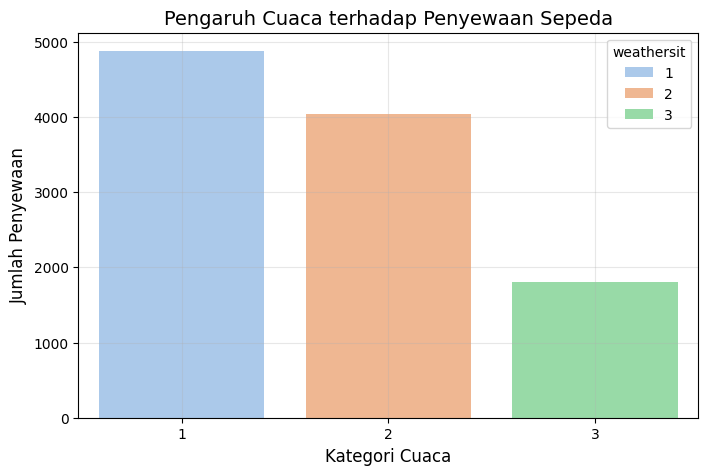

In [31]:
plt.figure(figsize=(8, 5))
sns.barplot(data=day_df, x='weathersit', y='cnt', hue='weathersit', palette="pastel", errorbar=None)
plt.title("Pengaruh Cuaca terhadap Penyewaan Sepeda", fontsize=14)
plt.xlabel("Kategori Cuaca", fontsize=12)
plt.ylabel("Jumlah Penyewaan", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

**Insight:**
- Saat cuaca cerah, jumlah penyewaan sepeda tertinggi.
- Penyewaan menurun saat cuaca mendung dan turun drastis saat hujan lebat.

**Rekommendasi:**
Jika memungkinkan, tambahkan shelter atau area parkir beratap untuk meningkatkan minat penyewaan saat hujan ringan.

### Tren Penyewaan Sepeda Berdasarkan Jam

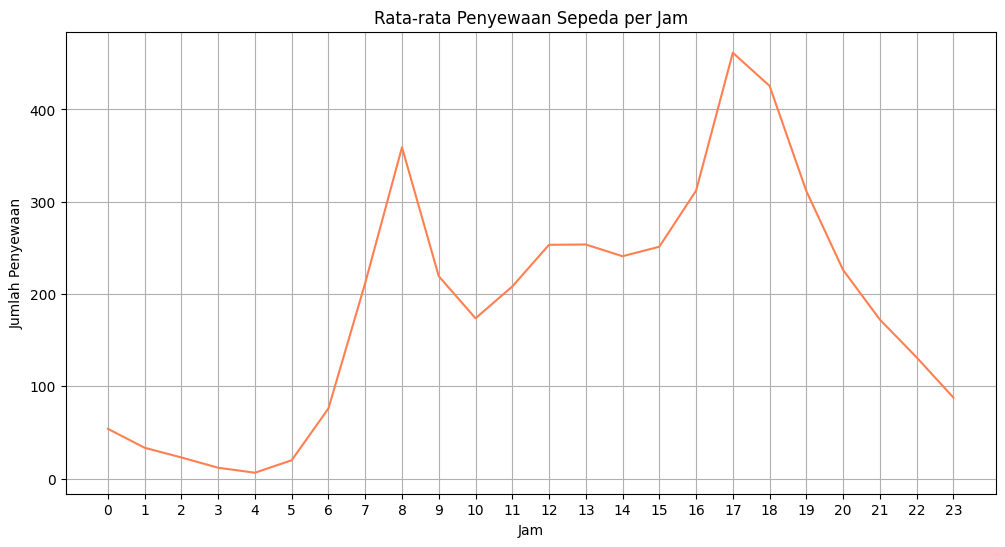

In [32]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_df, x='hr', y='cnt', estimator='mean', errorbar=None, color='coral')
plt.title("Rata-rata Penyewaan Sepeda per Jam")
plt.xlabel("Jam")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

**Insight:**
- Puncak penyewaan terjadi pada pagi (07:00 - 09:00) dan sore (17:00 - 19:00), menunjukkan bahwa sepeda banyak digunakan untuk keperluan komuter.
- Penyewaan lebih rendah di tengah hari dan malam.

**Rekomendasi:**
Tambahkan lebih banyak sepeda saat jam sibuk dan promosikan penyewaan di luar jam sibuk dengan diskon.

## Analisis Lanjutan (Opsional)

### Clustering dengan Manual Grouping

**Tujuan Analisis**

Clustering ini bertujuan untuk mengelompokkan hari-hari dalam dataset berdasarkan pola penyewaan sepeda. Dengan cara ini, kita bisa mengidentifikasi hari dengan penyewaan tinggi, sedang, atau rendah dan memahami faktor yang memengaruhi perbedaan tersebut.

**Metodologi**

Analisis dilakukan dengan binning (pengelompokan manual) berdasarkan jumlah penyewaan sepeda (cnt)
- Low Usage (Rendah): Penyewaan < 4.000
- Medium Usage (Sedang): Penyewaan 4.000 - 7.000
- High Usage (Tinggi): Penyewaan > 7.000

In [ ]:
# Menentukan kategori penggunaan sepeda berdasarkan jumlah penyewaan
def categorize_usage(cnt):
    if cnt < 4000:
        return 'Low Usage'
    elif 4000 <= cnt <= 7000:
        return 'Medium Usage'
    else:
        return 'High Usage'

In [ ]:
# Membuat kolom baru 'usage_category' berdasarkan fungsi di atas
day_df['usage_category'] = day_df['cnt'].apply(categorize_usage)

<Figure size 800x500 with 0 Axes>

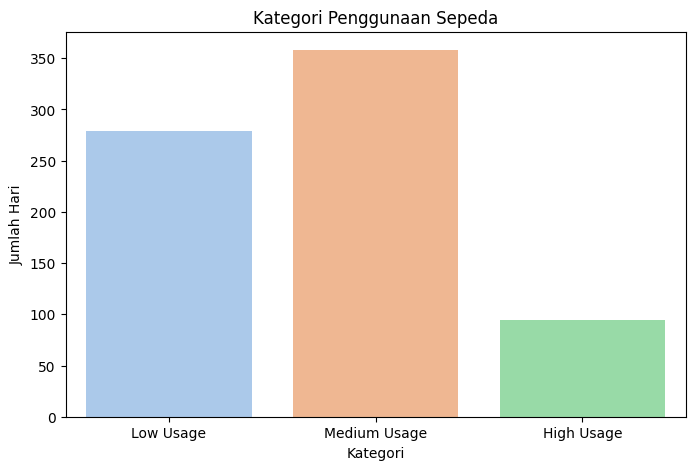

In [ ]:
# Visualisasi jumlah hari dalam setiap kategori
plt.figure(figsize=(8,5))
plt.figure(figsize=(8,5))
sns.countplot(data=day_df, x="usage_category", hue="usage_category", palette="pastel", legend=False)
plt.title("Kategori Penggunaan Sepeda")
plt.xlabel("Kategori")
plt.ylabel("Jumlah Hari")
plt.show()

**Insight:**
- Sebagian besar hari masuk dalam kategori 'Medium Usage', artinya sebagian besar hari memiliki jumlah penyewaan dalam rentang 4.000 - 7.000."
- Hari dengan 'High Usage' cukup signifikan, menandakan adanya hari-hari tertentu yang memiliki permintaan sepeda jauh lebih tinggi, kemungkinan pada akhir pekan, libur, atau musim tertentu."
- Sementara itu, hari dengan 'Low Usage' bisa jadi disebabkan oleh faktor cuaca buruk atau musim dingin."
- Dengan memahami pola ini, operator penyewaan sepeda bisa menyesuaikan jumlah sepeda yang tersedia pada hari-hari dengan kategori 'High Usage' dan menawarkan promo untuk meningkatkan penyewaan di kategori 'Low Usage'."

### Visualisasi Distribusi Kategori Penyewaan berdasarkan Musim

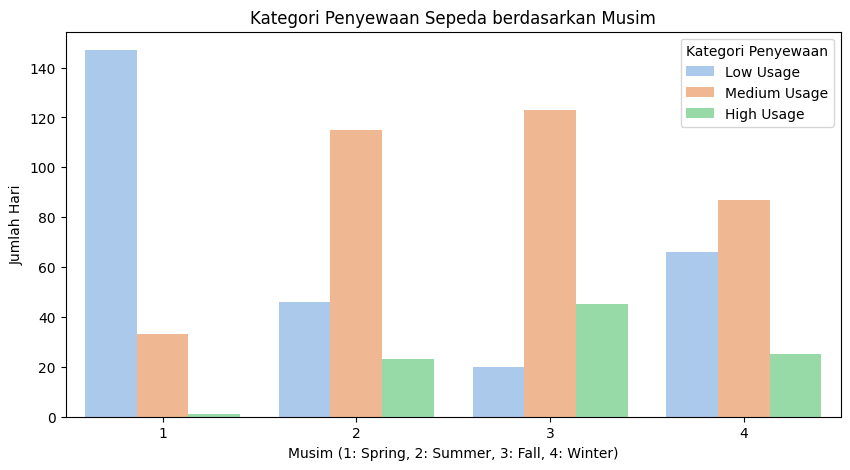

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=day_df, x='season', hue='usage_category', palette="pastel")
plt.title("Kategori Penyewaan Sepeda berdasarkan Musim")
plt.xlabel("Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)")
plt.ylabel("Jumlah Hari")
plt.legend(title="Kategori Penyewaan")
plt.show()

**Insight:**
- Musim gugur (Fall) memiliki jumlah hari 'High Usage' terbanyak, mengonfirmasi bahwa musim ini memiliki permintaan tertinggi.
- Musim dingin (Winter) memiliki jumlah hari 'Low Usage' terbanyak, kemungkinan karena cuaca ekstrem.
- Operator penyewaan sepeda dapat menggunakan wawasan ini untuk mengalokasikan sumber daya lebih efisien.

## Kesimpulan dari Analisis Lanjutan

- Dengan manual clustering, kita mengelompokkan hari-hari berdasarkan tingkat penyewaan: Low, Medium, High.
- Sebagian besar hari masuk dalam kategori Medium Usage, dengan High Usage lebih sering terjadi di musim gugur.
- Musim dingin memiliki hari dengan Low Usage terbanyak, yang dapat menjadi fokus untuk strategi pemasaran agar meningkatkan penyewaan.

**Strategi yang dapat dilakukan**
- Menambah jumlah sepeda di musim gugur untuk memenuhi permintaan.
- Memberikan insentif (diskon atau promo) di musim dingin untuk meningkatkan penyewaan.
- Menyesuaikan jumlah sepeda di berbagai hari berdasarkan kategori penyewaan.

## Kesimpulan

### Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda
- Cuaca memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda.
- Penyewaan sepeda tertinggi terjadi saat cuaca cerah, menunjukkan bahwa orang lebih cenderung menggunakan sepeda dalam kondisi yang nyaman.
- Saat cuaca mendung, jumlah penyewaan mulai menurun, tetapi masih cukup tinggi.
- Penyewaan turun dtastis saat hujan ringan dan semakin berkurang saat hujan lebat.

**Implikasi:**
- Faktor cuaca merupakan variabel penting dalam menentukan strategi penyewaan sepeda.
- Saat hujan, penyewaan menurun karena kenyamanan dan keamanan berkendara berkurang.

### Waktu Paling Sibuk dalam Sehari
- Penyewaan sepeda menunjukkan dua puncak utama, yakni di pagi hari (07:00 - 09:00) yang merupakan waktu berangkat kerja/sekolah dan sore hari (17:00 - 19:00) yang merupakan waktu pulang kerja/sekolah.
- Aktivitas penyewaan menurun di siang hari dan mencapai titik terendah pada malam hari (setelah pukul 21:00).
- Pola ini menunjukkan bahwa sepeda digunakan sebagai alternatif transportasi utama bagi pekerja dan pelajar.

**Implikasi:**
- Penyewaan sepeda banyak digunakan untuk keperluan komuter harian.
- Permintaan sepeda lebih tinggi di jam sibuk, sehingga pengelolaan stok harus mempertimbangkan lonjakan permintaan di pagi dan sore hari.

### Rekomendasi Strategis
- Optimalisasi stok dan ketersediaan sepeda.
- Strategi untuk mengatasi pengaruh cuaca.
- Meningkatkan penyewaan di luar jam sibuk.
- Pengembangan layanan berbasis data.